In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.preprocessing import normalize
from pprint import pprint

/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Import dataset
df = pd.read_csv('./data/features-total-1770c41.csv')
tag_df = pd.read_csv('./data/tag.csv')
labels = df.columns
df.head()

,isContributorAnonymous,isBot,timeOfDay,localizedTimeOfDay,dayOfWeek,localizedDayOfWeek,isMinorEdit,authorRank,authorRankOfLast200Edits,authorRankOneMonth,...,LZWCompressionRate,KLDOfCharDistribution,commentLength,userCommentLength,templateUseFlags,templateUseFifaFlags,templateUsePageLink,templateUseYesNo,revision_id,tag_id
0,0.0,0.0,13.0,-1.0,7.0,-1.0,0.0,0.000000,0.000000,0.0,...,0.513889,1024.000000,34.0,34.0,0.0,0.0,0.0,0.0,228189784,12
1,0.0,0.0,2.0,-1.0,2.0,-1.0,0.0,0.833333,0.857143,0.5,...,0.308994,4.126739,14.0,14.0,0.0,0.0,0.0,0.0,730449352,12
2,0.0,0.0,17.0,-1.0,6.0,-1.0,1.0,0.000000,0.000000,0.0,...,0.434896,85.525822,67.0,0.0,0.0,0.0,2.0,0.0,216224416,12
3,0.0,1.0,1.0,-1.0,4.0,-1.0,1.0,0.000000,0.000000,0.0,...,0.353894,1.286642,152.0,0.0,0.0,0.0,0.0,0.0,539338621,12
4,1.0,0.0,20.0,23.0,2.0,2.0,0.0,-1.000000,-1.000000,-1.0,...,0.428264,342.595182,10.0,10.0,0.0,0.0,0.0,0.0,746191686,12


In [4]:
# Convert from pandas to numpy arrays
X = df.drop(['tag_id'], axis=1)
y = df['tag_id']
X = X.values
y = y.values
feature_labels = df.columns

In [5]:
# Util methods
def get_tag_ids():
    tags = df['tag_id'].unique()
    tags.sort()
    return tags

def get_tag_by_id(tag_id):
    return tag_df[tag_df['id'] == tag_id]['name'].values[0]

def filter_by_tag(y, tag_id):
    return np.array([1 if tag == tag_id else 0 for tag in y])

def cross_validate_model(model, X, y):    
    return cross_validate(model, X, y, 
                          scoring=['precision', 'accuracy', 'f1'],
                          cv=2, return_train_score=False)

def precision_recall_graph(y_test, y_predict):
    precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
    average_precision = average_precision_score(y_test, y_predict)

    plt.title('Precision-Recall: Average Precision=  %0.2f' % average_precision)
    plt.step(recall, precision, color='b', where='post')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
def confusion_matrx(y_test, y_predict, label):
    # Evaluate model: Confusion matrix
    columns = ['Predicted No ' + label, 'Predicted ' + label]
    index = ['True No ' + label, 'True' + label]

    print('Final model scores:')
    df = pd.DataFrame(confusion_matrix(y_test, y_predict), columns=columns, index=index)
    print(df.head())


In [6]:
# TODO: Normalize
X = normalize(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Build models for every tag
models = dict()

for tag_id in get_tag_ids():
    tag_label = get_tag_by_id(tag_id)
    y_chunk = filter_by_tag(y_train, tag_id)

    print(f'Training model for tag id {tag_id} {tag_label}')
    model = RandomForestClassifier(class_weight='balanced')
    scores = cross_validate_model(model, X_train, y_chunk)
    models[tag_id] = model

Training model for tag id 1 Blanking
Training model for tag id 2 Nonsense
Training model for tag id 3 QualityIssue
Training model for tag id 4 PersonalStory
Training model for tag id 5 FalseFacts
Training model for tag id 6 Syntax
Training model for tag id 7 MergeConflict
Training model for tag id 8 Template


/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training model for tag id 9 EditWars
Training model for tag id 10 SEO


/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training model for tag id 11 Intention
Training model for tag id 12 constructive


Train model for tag Blanking


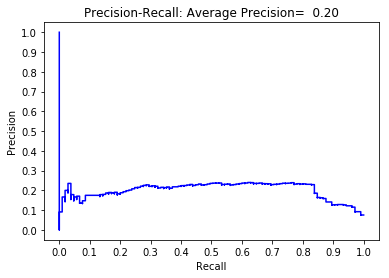

Final model scores:
                  Predicted No Blanking  Predicted Blanking
True No Blanking                   1175                 219
TrueBlanking                         38                  67
Train model for tag Nonsense


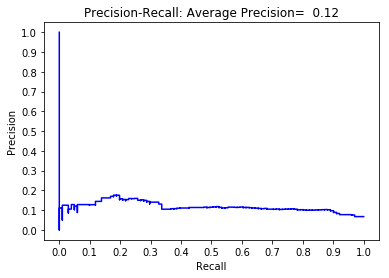

Final model scores:
                  Predicted No Nonsense  Predicted Nonsense
True No Nonsense                    829                 569
TrueNonsense                         32                  69
Train model for tag QualityIssue


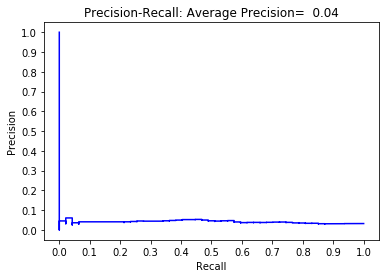

Final model scores:
                      Predicted No QualityIssue  Predicted QualityIssue
True No QualityIssue                        991                     461
TrueQualityIssue                             24                      23
Train model for tag PersonalStory


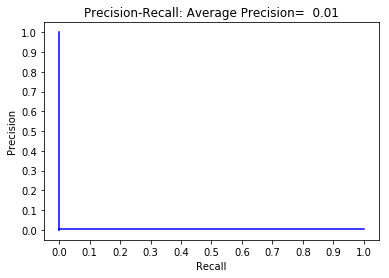

Final model scores:
                       Predicted No PersonalStory  Predicted PersonalStory
True No PersonalStory                        1347                      148
TruePersonalStory                               4                        0
Train model for tag FalseFacts


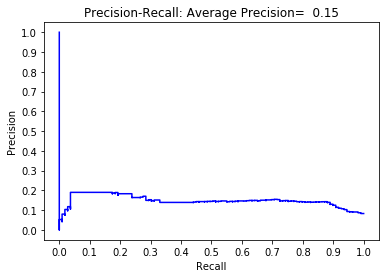

Final model scores:
                    Predicted No FalseFacts  Predicted FalseFacts
True No FalseFacts                      943                   447
TrueFalseFacts                           30                    79
Train model for tag Syntax


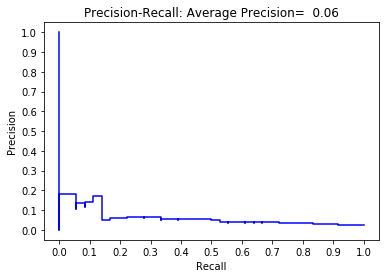

Final model scores:
                Predicted No Syntax  Predicted Syntax
True No Syntax                 1402                61
TrueSyntax                       31                 5
Train model for tag MergeConflict


/Users/legelhcs/.local/share/virtualenvs/classifier-iP8VO_s3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


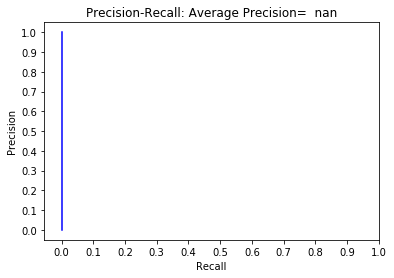

Final model scores:


ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

In [8]:
# Evaluate models:
for tag_id in get_tag_ids():
    label = get_tag_by_id(tag_id)
    print('Train model for tag', label)
    model = models[tag_id]
    y_train_tag = filter_by_tag(y_train, tag_id)
    y_test_tag = filter_by_tag(y_test, tag_id)

    model.fit(X_train, y_train_tag)
    y_predict = model.predict(X_test)
    y_predict_prob = model.predict_proba(X_test)
    y_predict_vandalism = y_predict_prob[:,1]
    precision_recall_graph(y_test_tag, y_predict_vandalism)
    confusion_matrx(y_test_tag, y_predict, label)